<a href="https://colab.research.google.com/github/starboiiiii11/Intel-Unnati-TeleICU/blob/main/monitoring-patients-yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monitoring System for TeleICU Patients Using Video Processing and Deep Learning

## Analyzing the Data

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from glob import glob

import IPython.display as ipd
from IPython.display import Video
from tqdm import tqdm

import subprocess

plt.style.use('ggplot')

## Video Metadata extraction

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/ICUdataset/ICUdata/How-To-Lie-The-Good-Doctor.mp4')

In [ ]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

2129.0

In [ ]:
# Video height and width
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(f'Height {height}, Width {width}')

Height 720.0, Width 1280.0


In [ ]:
# Get frames per second
fps = cap.get(cv2.CAP_PROP_FPS)
print(f'FPS : {fps:0.2f}')

FPS : 23.98


In [ ]:
cap.release()

In [ ]:
cap = cv2.VideoCapture('/content/drive/MyDrive/ICUdataset/ICUdata/How-To-Lie-The-Good-Doctor.mp4')
ret, img = cap.read()
print(f'Returned {ret} and img of shape {img.shape}')

Returned True and img of shape (720, 1280, 3)


In [ ]:
## Helper function for plotting opencv images in notebook
def display_cv2_img(img, figsize=(10, 10)):
    img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(img_)
    ax.axis("off")

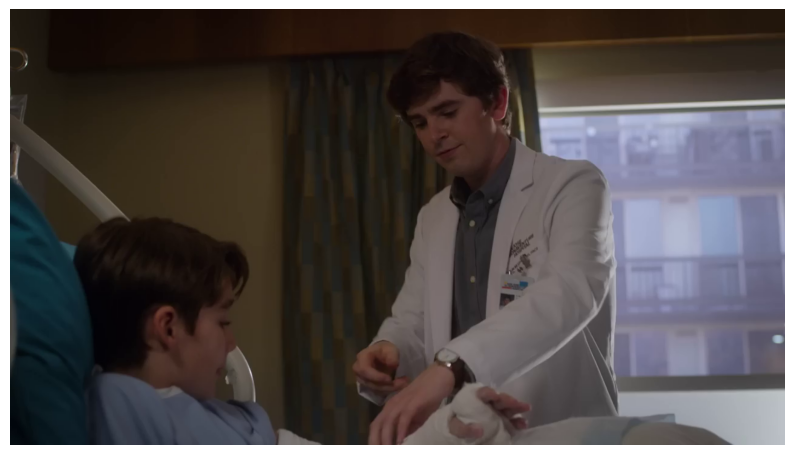

In [ ]:
display_cv2_img(img)

In [ ]:
cap.release()

## Displaying Multiple frames from the video

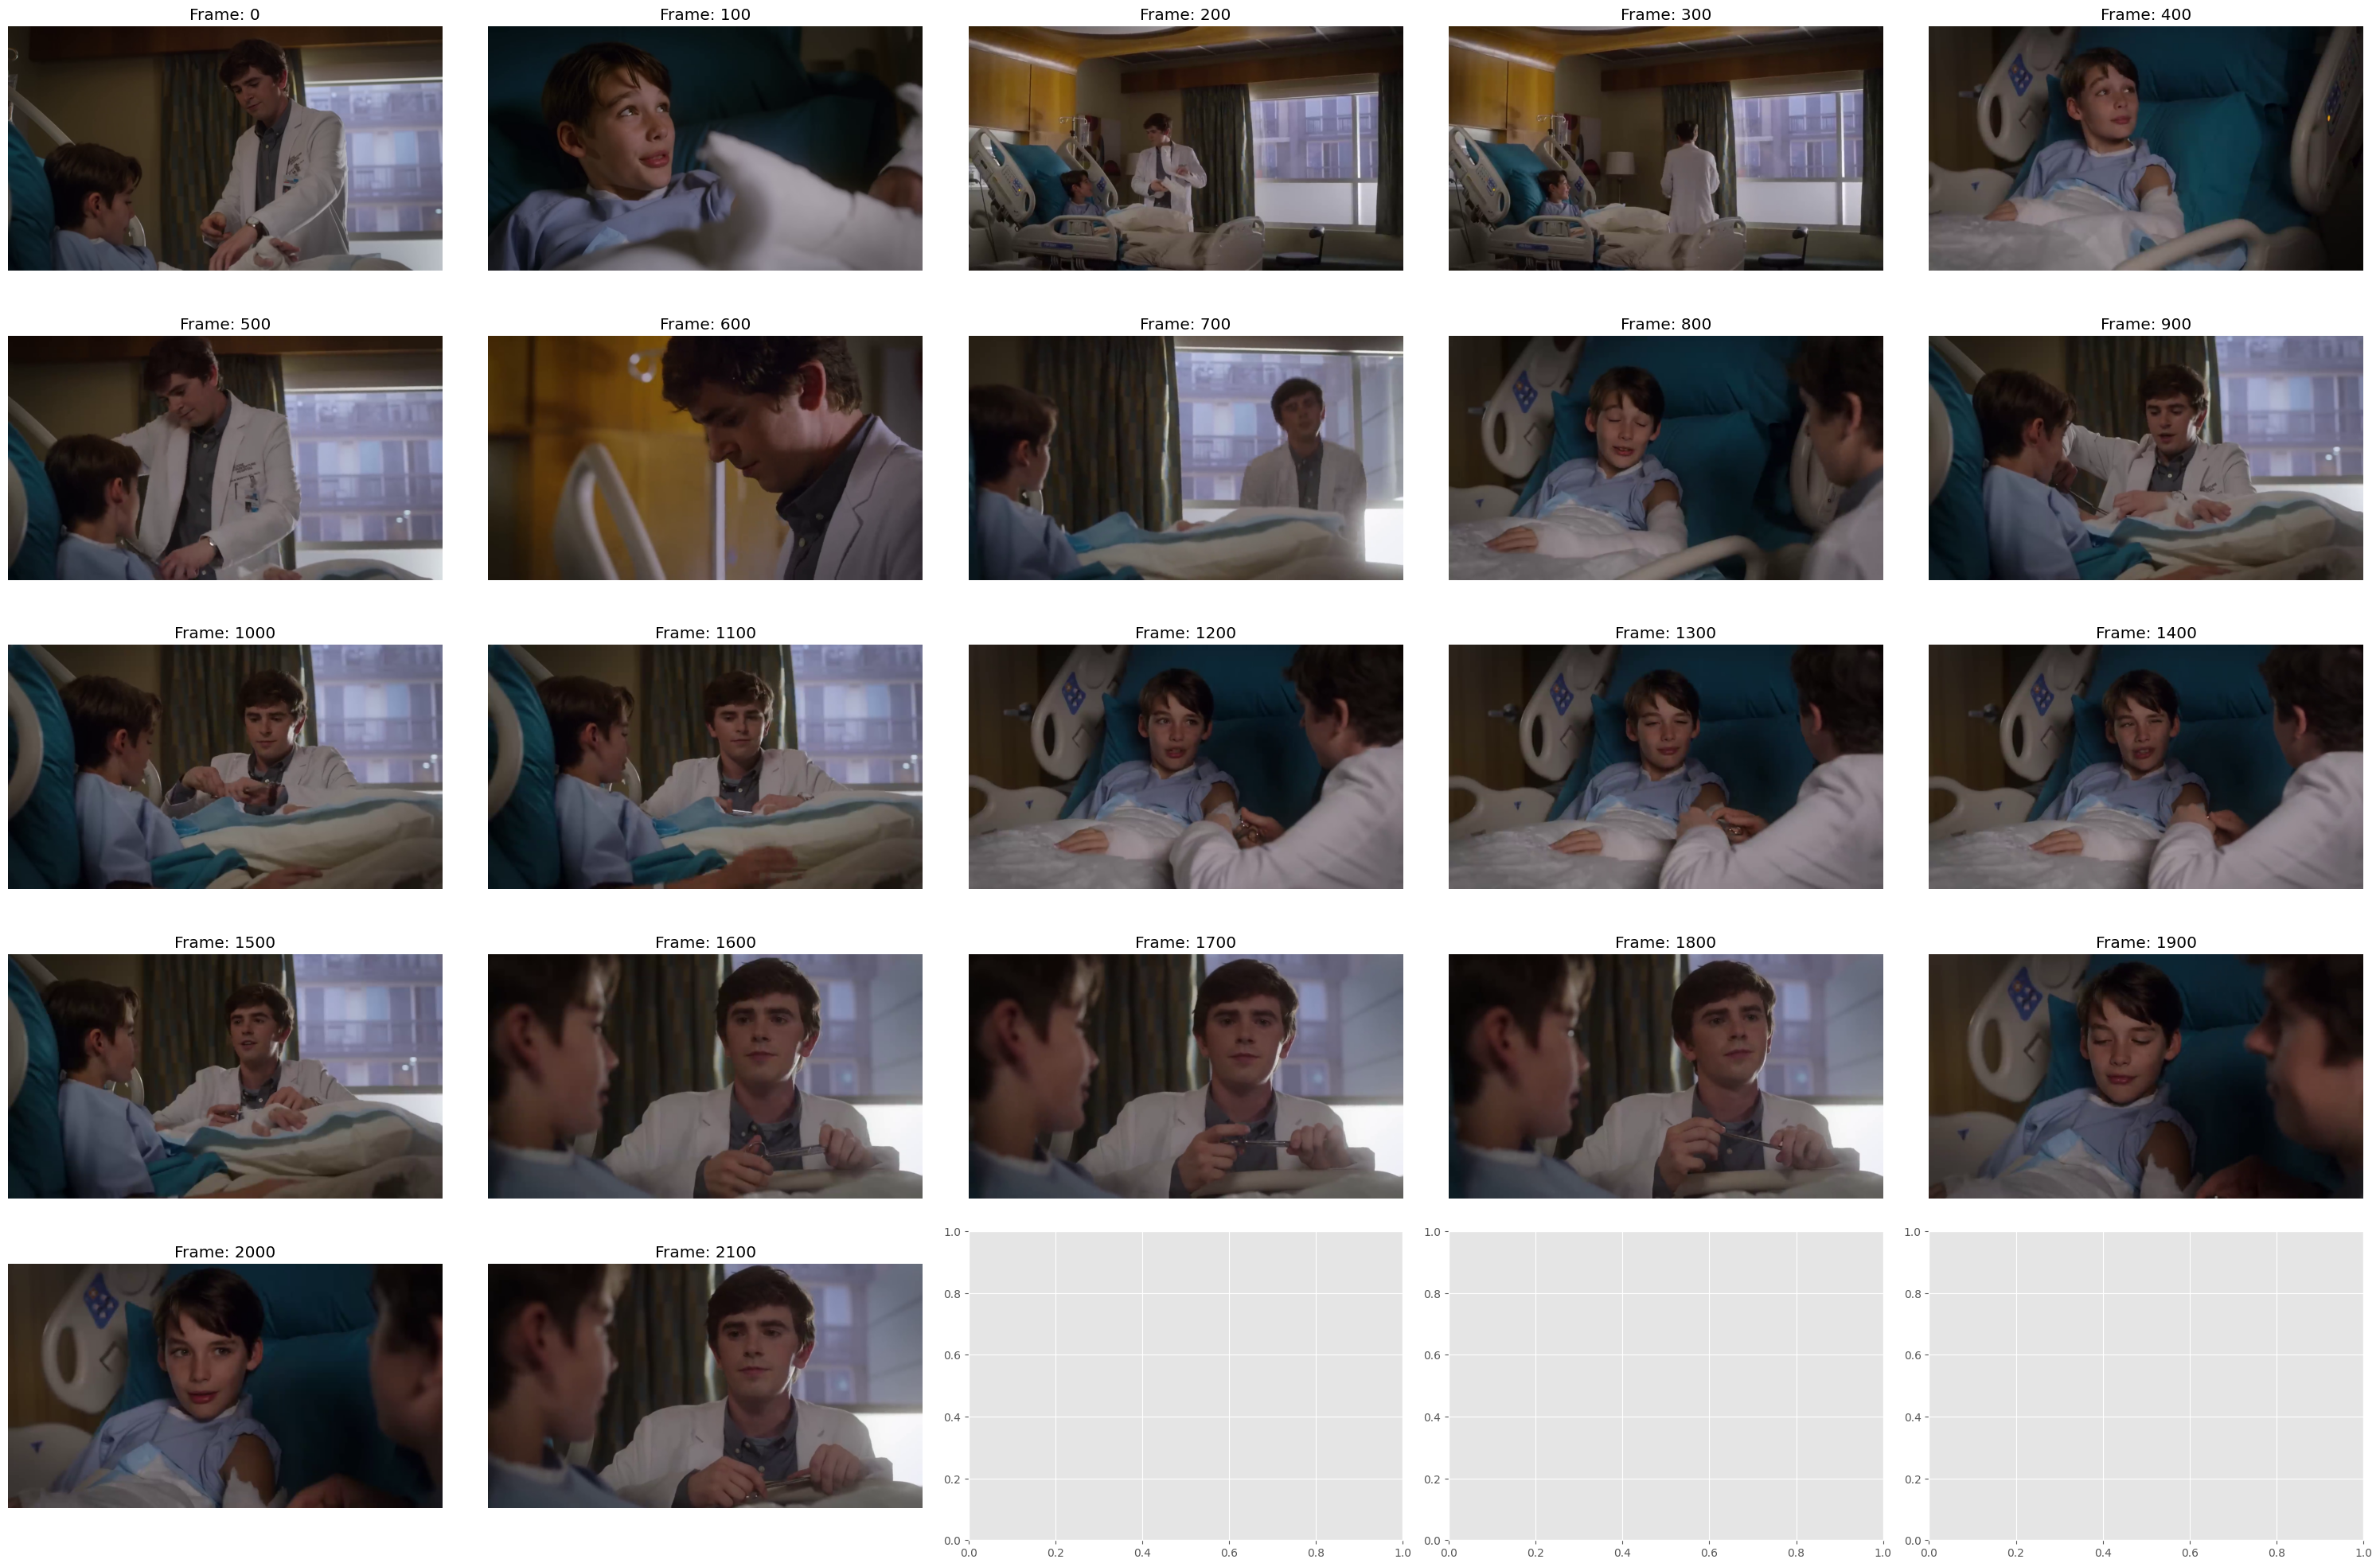

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(30, 20))
axs = axs.flatten()

cap = cv2.VideoCapture("/content/drive/MyDrive/ICUdataset/ICUdata/How-To-Lie-The-Good-Doctor.mp4")
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

img_idx = 0
for frame in range(n_frames):
    ret, img = cap.read()
    if ret == False:
        break
    if frame % 100 == 0:
        axs[img_idx].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[img_idx].set_title(f'Frame: {frame}')
        axs[img_idx].axis('off')
        img_idx += 1

plt.tight_layout()
plt.show()
cap.release()

## Training the YOLOv8 model

In [ ]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.1/302.1 kB 11.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-many

In [ ]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.1/800.1 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.20
    Uninstalling ultralytics-8.0.20:
      Successfully uninstalled ultralytics-8.0.20


In [ ]:
!pip install torch torchvision

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [ ]:
!ls

data.yaml  runs  test  train  val  videos  yolov8n.pt  yolov8s.pt


In [ ]:
%cd /content/drive/MyDrive/dataset

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/dataset
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

## Detection and Visualization of the Trained Model

In [ ]:
!ls runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1720706730.78b315a5ed73.1429.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2280.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch2281.jpg  weights
P_curve.png					    train_batch2282.jpg
PR_curve.png					    train_batch2.jpg


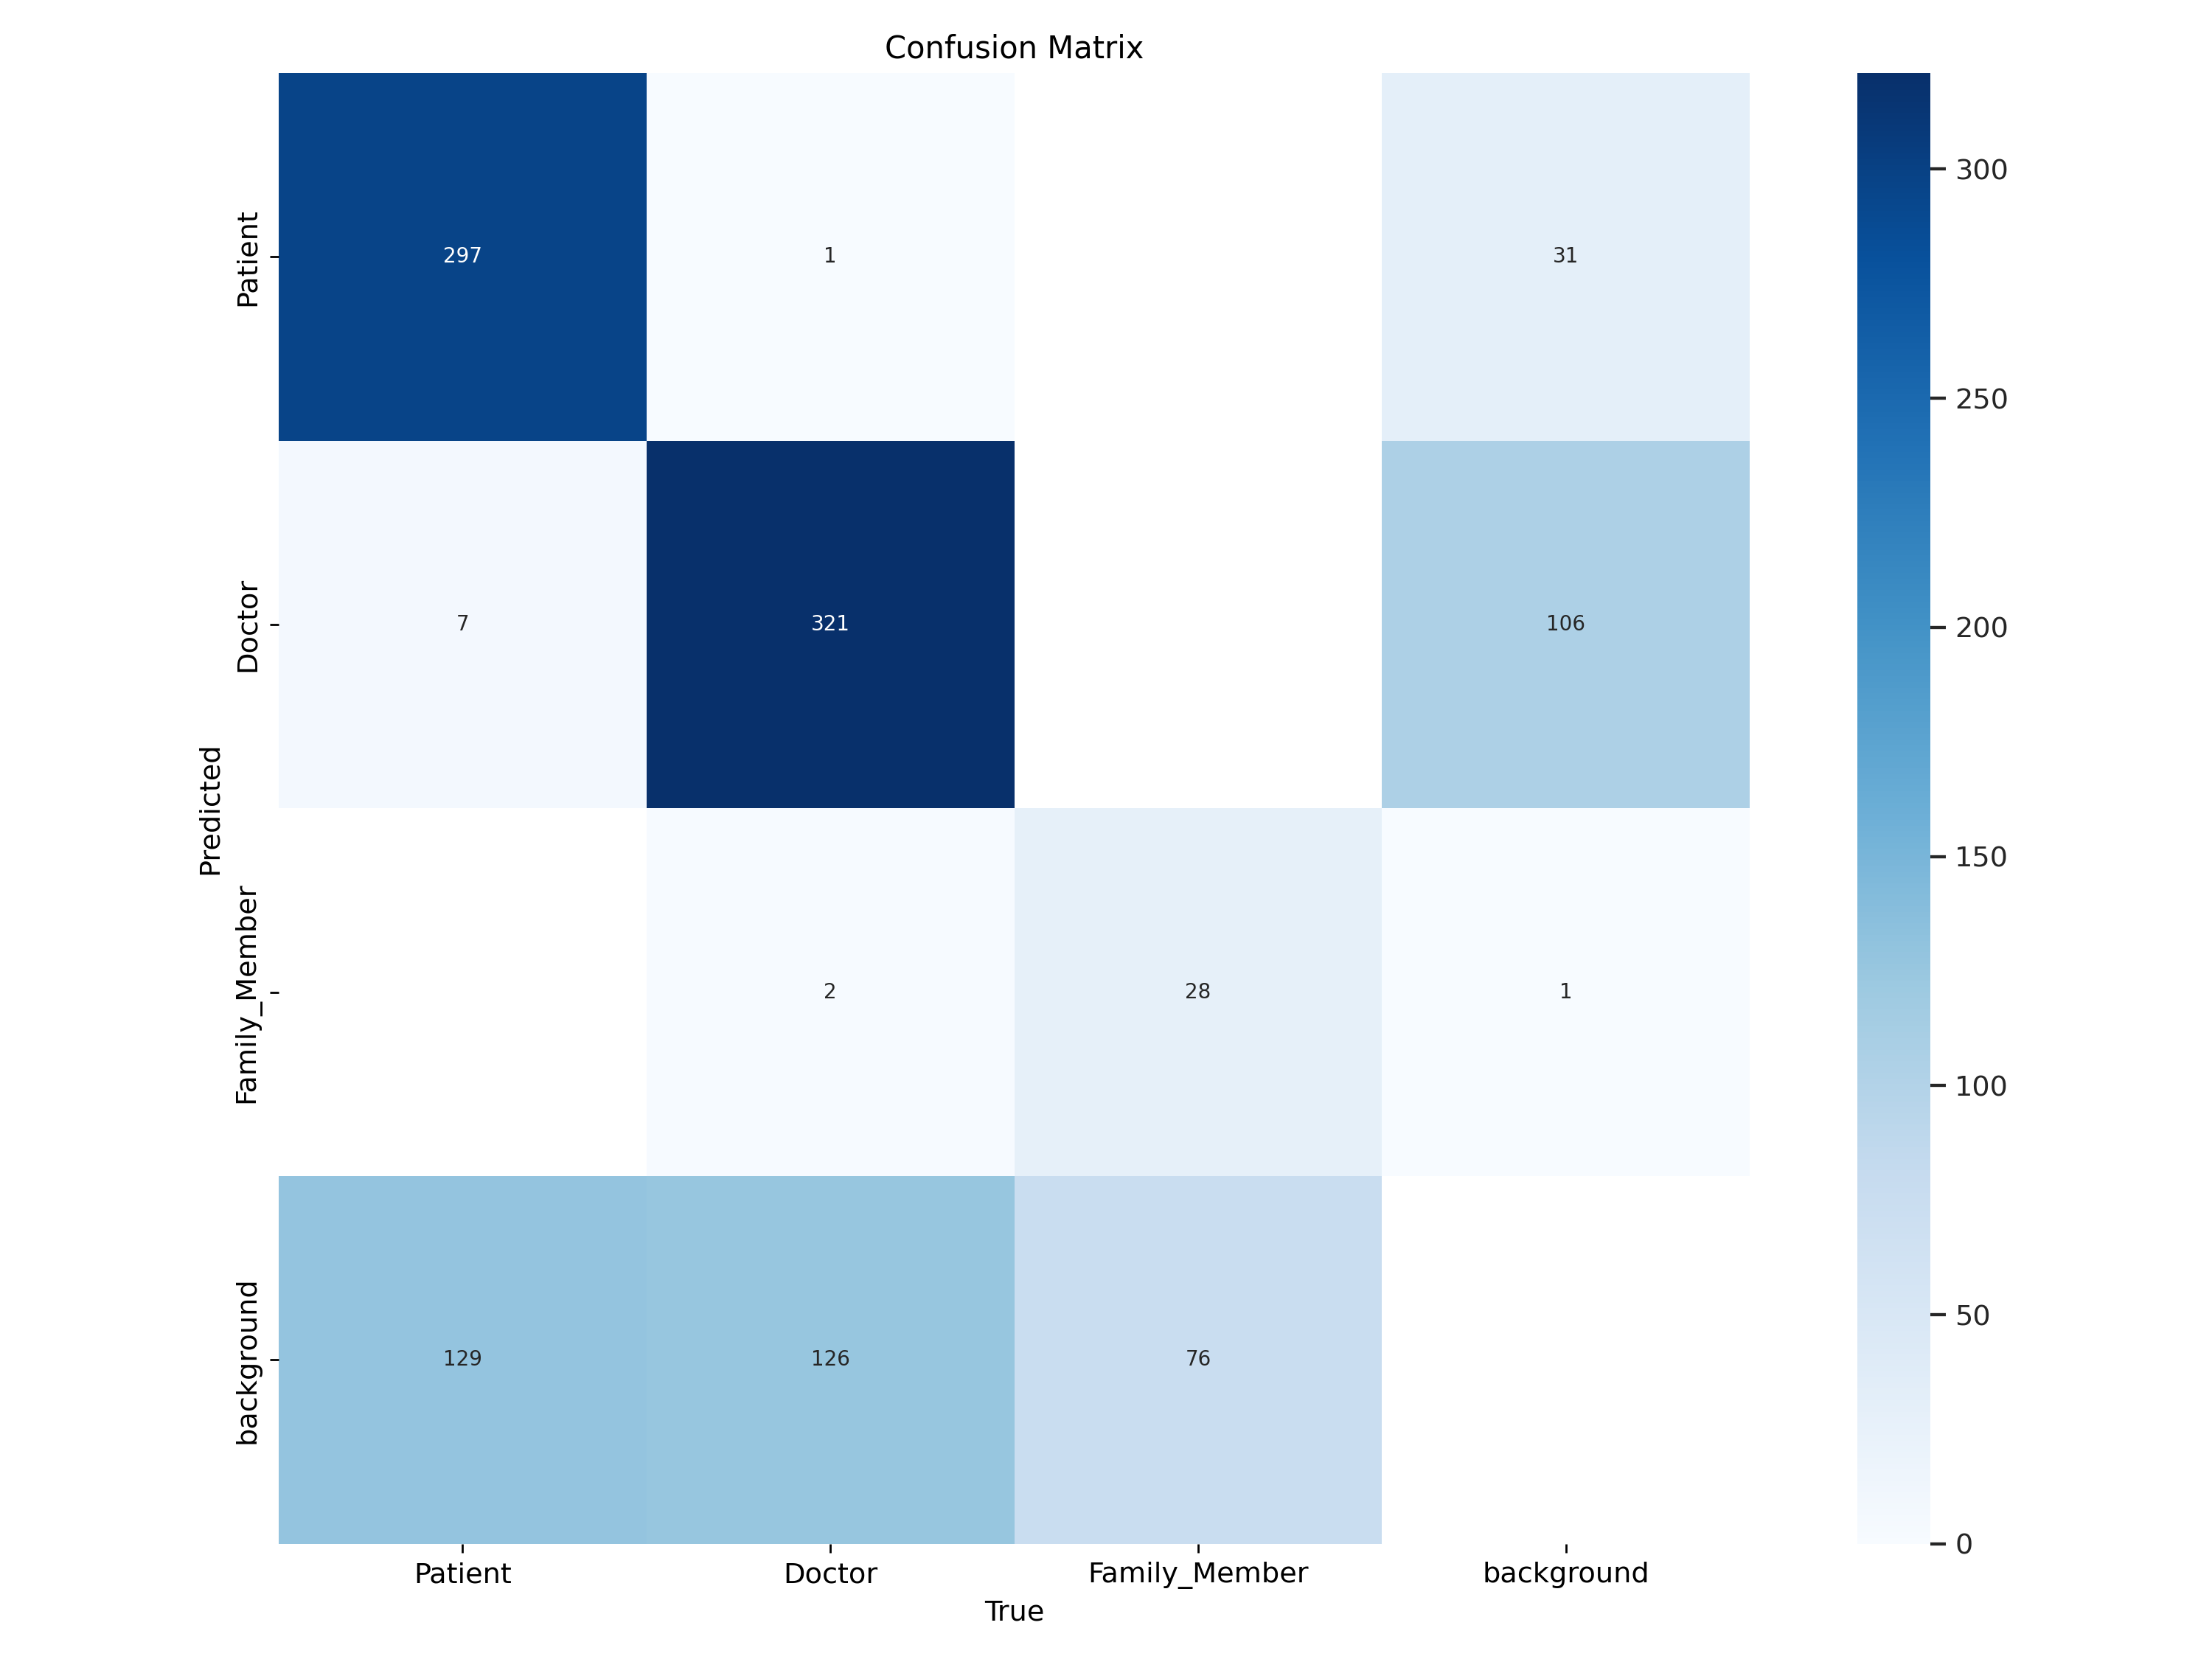

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=600)

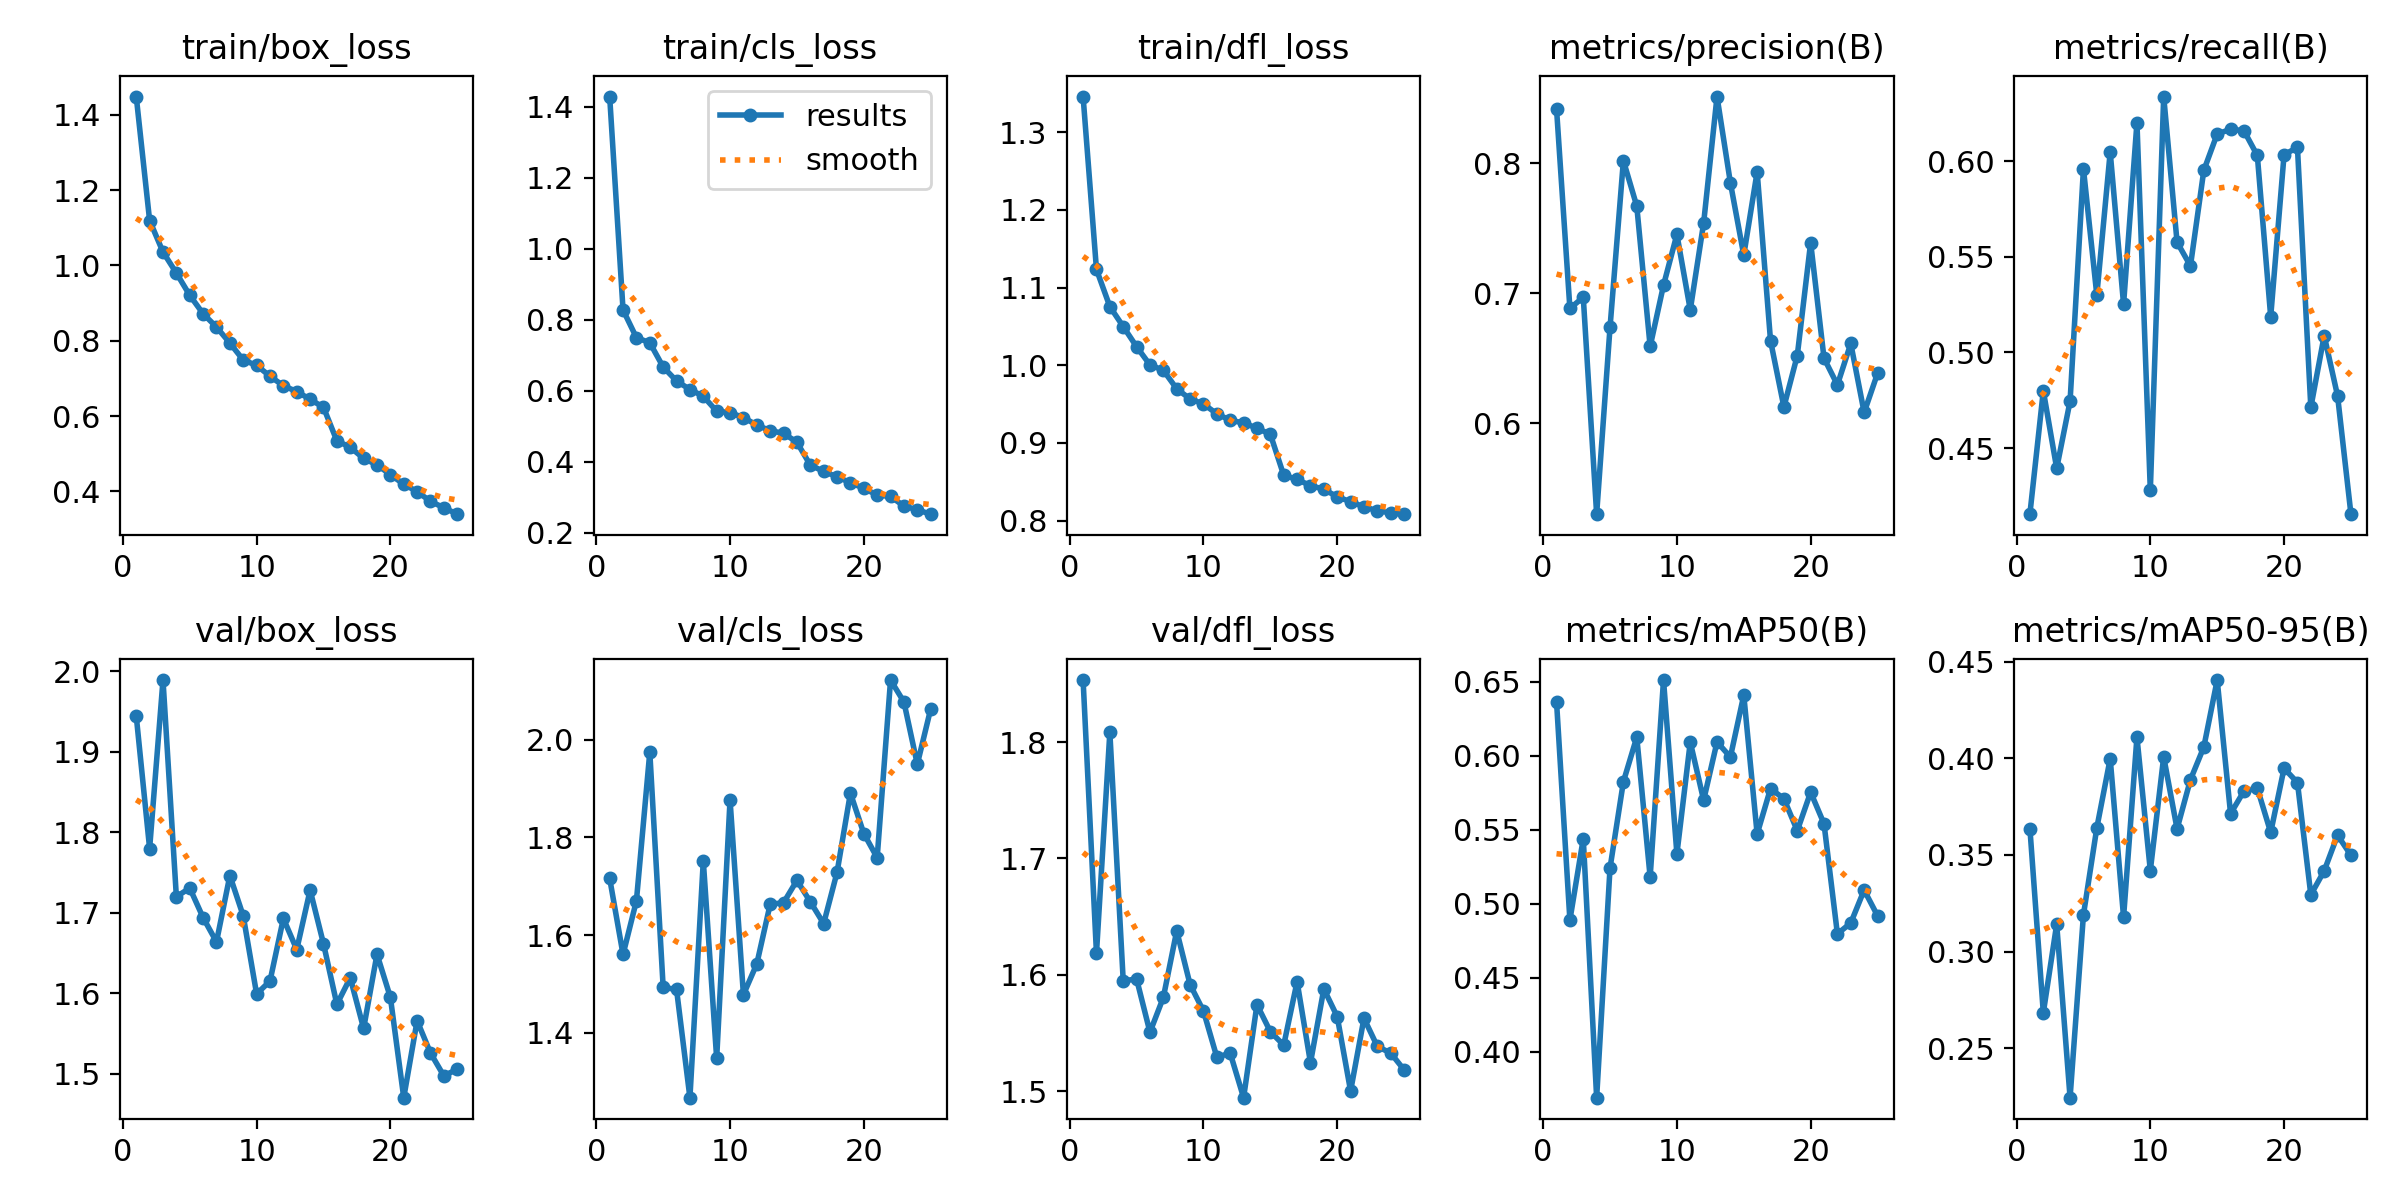

In [ ]:
Image(filename='runs/detect/train2/results.png', width=600)

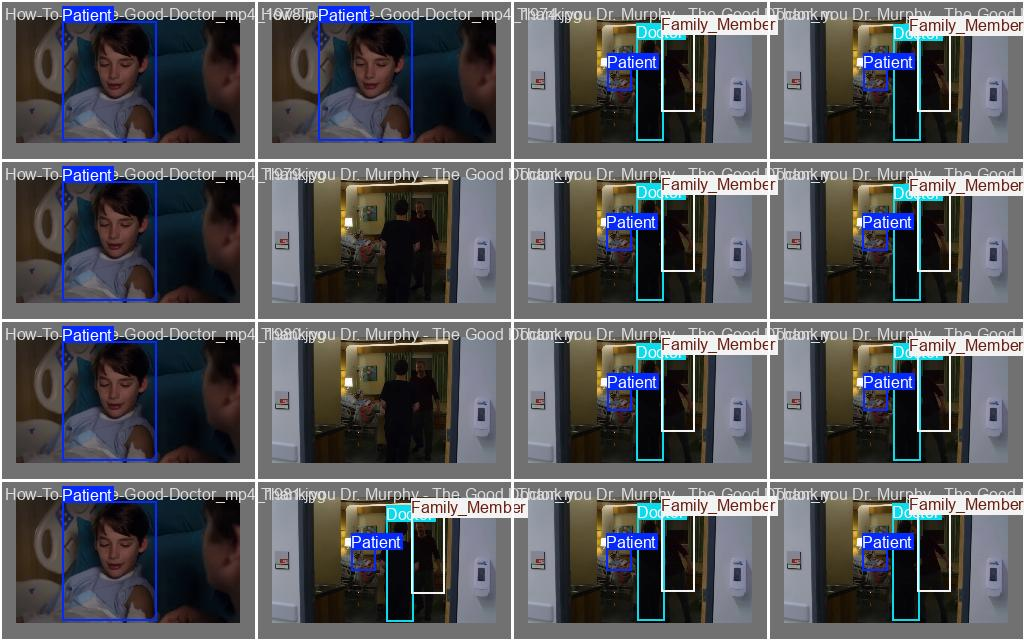

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/train2/val_batch1_labels.jpg', width=600)

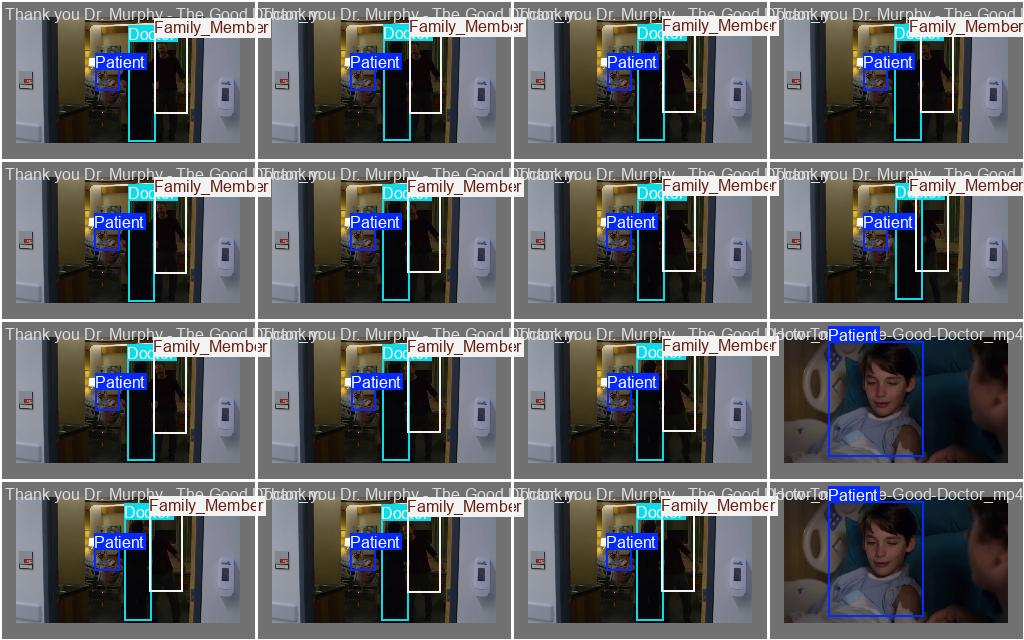

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/train2/val_batch2_labels.jpg', width=600)

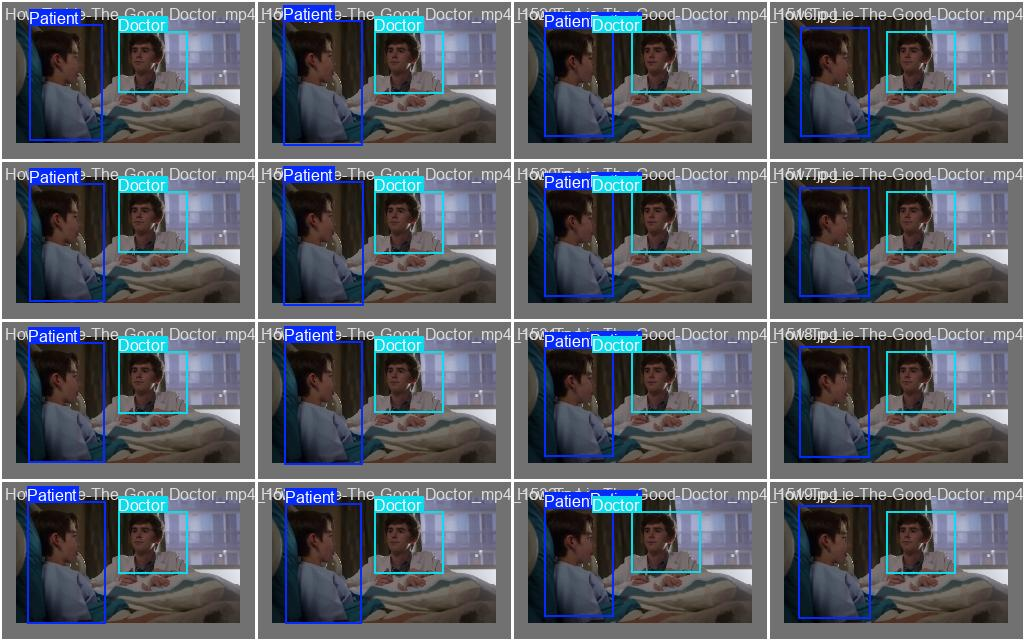

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/train3/val_batch1_labels.jpg', width=600)

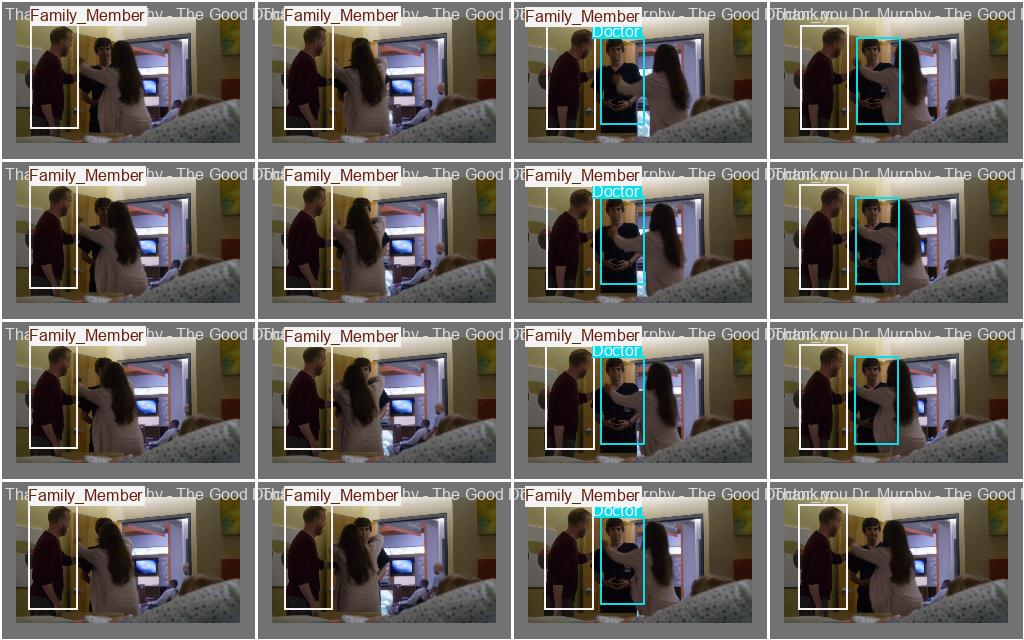

In [ ]:
Image(filename='/content/drive/MyDrive/dataset/runs/detect/val/val_batch1_labels.jpg', width=600)

## Validation of the dataset

In [ ]:
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/dataset/val/labels.cache... 701 images, 86 backgrounds, 70 corrupt: 100% 701/701 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/val/images/How-To-Lie-The-Good-Doctor_mp4_1529.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0111]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/val/images/How-To-Lie-The-Good-Doctor_mp4_1659.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0083]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/val/images/How-To-Lie-The-Good-Doctor_mp4_1660.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0292]
val: WARNING ⚠️ /content/drive/MyDrive/dataset/val/images/How-To-Lie-The-Good-Doctor_mp4_1661.jpg: ignoring corrupt image/label: non-nor

## Prediction of Model on `test` images

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2001.jpg: 128x224 1 Patient, 1 Doctor, 114.7ms
image 2/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2002.jpg: 128x224 1 Patient, 1 Doctor, 12.7ms
image 3/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2003.jpg: 128x224 1 Patient, 1 Doctor, 19.8ms
image 4/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2004.jpg: 128x224 1 Patient, 1 Doctor, 26.5ms
image 5/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2005.jpg: 128x224 1 Patient, 1 Doctor, 18.1ms
image 6/128 /content/drive/MyDrive/dataset/test/images/How-To-Lie-The-Good-Doctor_mp4_2006.jpg: 128x224 1 Patient, 1 Doctor, 11.7ms
image 7/128 /content/drive/MyDrive/dat

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prediction of model on Video data

In [ ]:
import cv2
import torch
import numpy as np

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

# Open the video file
video_path = 'TEST.mp4'
cap = cv2.VideoCapture(video_path)

# Get video details
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make predictions
    results = model(img)

    # Get bounding boxes and labels
    labels, coords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    # Process each detection
    for i in range(len(labels)):
        box = coords[i]
        if box[4] >= 0.2:  # Confidence threshold
            x1, y1, x2, y2 = int(box[0] * frame_width), int(box[1] * frame_height), int(box[2] * frame_width), int(box[3] * frame_height)
            label = f"{model.names[int(labels[i])]}: {box[4]:.2f}"
            color = (255, 0, 0)  # Red color for bounding box

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            # Put label near bounding box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame into the file 'output.avi'
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("/content/drive/MyDrive/dataset/runs/detect/train/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/content/drive/MyDrive/dataset/videos/TEST.mp4", save=True, imgsz=320, conf=0.5)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[ 63.00000, 304.00000, 304.00000, 716.00000,   0.73325,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[6.10000e+01, 3.00000e+02, 3.05000e+02, 7.16000e+02, 7.21454e-01, 1.00000e+00],
         [3.55000e+02, 3.50000e+02, 5.33000e+02, 6.94000e+02, 5.79461e-01, 1.00000e+00]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[356.00000, 348.00000, 531.00000, 692.00000,   0.73821,   1.00000],
         [ 61.00000, 297.00000, 304.00000, 716.00000,   0.73251,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("/content/drive/MyDrive/dataset/runs/detect/train/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/content/drive/MyDrive/dataset/videos/TEST-2.mp4", save=True, imgsz=320, conf=0.3)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict2


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[171.00000, 244.00000, 659.00000, 720.00000,   0.84351,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[174.00000, 231.00000, 662.00000, 720.00000,   0.87099,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[179.00000, 229.00000, 661.00000, 720.00000,   0.87503,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[186.00000, 220.00000, 669.00000, 720.00000,   0.88088,   1.00000]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> ma

In [ ]:
import os
import cv2
import torch
import numpy as np

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

# Open the video file
video_path = 'TEST-3.mp4'
cap = cv2.VideoCapture(video_path)

# Get video details
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make predictions
    results = model(img)

    # Get bounding boxes and labels
    labels, coords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    # Process each detection
    for i in range(len(labels)):
        box = coords[i]
        if box[4] >= 0.2:  # Confidence threshold
            x1, y1, x2, y2 = int(box[0] * frame_width), int(box[1] * frame_height), int(box[2] * frame_width), int(box[3] * frame_height)
            label = f"{model.names[int(labels[i])]}: {box[4]:.2f}"
            color = (255, 0, 0)  # Red color for bounding box

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            # Put label near bounding box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame into the file 'output.avi'
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("/content/drive/MyDrive/dataset/runs/detect/train2/weights/best.pt")

# Define path to video file
source = "/content/drive/MyDrive/dataset/videos/TEST-3.mp4"

# Run inference on the source
results = model(source, stream=True)  # generator of Results objects

In [ ]:
import os
import cv2
import torch
import numpy as np

model_path = os.path.join('.', 'runs', 'detect', 'train2', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

# Open the video file
video_path = 'TEST-3.mp4'
cap = cv2.VideoCapture(video_path)

# Get video details
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to RGB
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Make predictions
    results = model(img)

    # Get bounding boxes and labels
    labels, coords = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    # Process each detection
    for i in range(len(labels)):
        box = coords[i]
        if box[4] >= 0.2:  # Confidence threshold
            x1, y1, x2, y2 = int(box[0] * frame_width), int(box[1] * frame_height), int(box[2] * frame_width), int(box[3] * frame_height)
            label = f"{model.names[int(labels[i])]}: {box[4]:.2f}"
            color = (255, 0, 0)  # Red color for bounding box

            # Draw bounding box
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            # Put label near bounding box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Write the frame into the file 'output.avi'
    out.write(frame)

    # Display the resulting frame
    cv2.imshow('Frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO("/content/drive/MyDrive/dataset/runs/detect/train/weights/best.pt")

# Run inference on 'bus.jpg' with arguments
model.predict("/content/drive/MyDrive/dataset/videos/TEST-3.mp4", save=True, imgsz=320, conf=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1641) /content/drive/MyDrive/dataset/videos/TEST-3.mp4: 192x320 (no detections), 12.6ms
video 1/1 (frame 2/1641) /content/drive/MyDrive/dataset/videos/TEST-3.mp4: 192x320 (no detections), 24.6ms
video 1/1 (frame 3/1641) /content/drive/MyDrive/dataset/videos/TEST-3.mp4: 192x320 (no detections), 26.4ms
video 1/1 (frame 4/1641) /content/drive/MyDrive/dataset/videos/TEST-3.mp4: 192x320 (no detections), 8.1ms
video 1/1 (frame 5/1641) /con

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Patient', 1: 'Doctor', 2: 'Family_Member'}
 obb: None
 orig_img: array([[[ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36],
         ...,
         [ 46,  33,  24],
         [ 45,  32,  23],
         [ 45,  32,  23]],
 
        [[ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36],
         ...,
         [ 46,  33,  24],
         [ 45,  32,  23],
         [ 45,  32,  23]],
 
        [[ 36,  36,  36],
         [ 36,  36,  36],
         [ 36,  36,  36],
         ...,
         [ 46,  33,  24],
         [ 45,  32,  23],
         [ 45,  32,  23]],
 
        ...,
 
        [[ 47,  39,  29],
         [ 47,  39,  29],
         [ 47,  39,  29],
         ...,
         [111,  70,  48],
         [111,  70,  48],
         [111,  70,  48]],
 
        [[ 47,  39,  29],
         [ 47,  39,  29],
         [ 47,  39,  29]